# Modeling Cross Section Data with XGB

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import sys

# This allows us to import the nucml utilities
sys.path.append("../..")

import nucml.exfor.data_utilities as exfor_utils 
import nucml.datasets as nuc_data 
import nucml.model.utilities as model_utils
import nucml.model.plot as model_plots

In [2]:
import seaborn as sns

In [3]:
import importlib
importlib.reload(exfor_utils)
importlib.reload(nuc_data)
importlib.reload(model_plots)
importlib.reload(model_utils)
print("Finish re-loading scripts.")

Finish re-loading scripts.


# Inspecting XGBoost Training Parameters

In [4]:
results_b0 = pd.read_csv("xgb_resultsB0.csv")
results_b1 = pd.read_csv("xgb_resultsB1.csv")
results_b2 = pd.read_csv("xgb_resultsB2.csv")
results_b3 = pd.read_csv("xgb_resultsB3.csv")
results_b4 = pd.read_csv("xgb_resultsB4.csv")

In [5]:
b0_min = results_b0.train_mae.min()
b1_min = results_b1.train_mae.min()
b2_min = results_b2.train_mae.min()
b3_min = results_b3.train_mae.min()
b4_min = results_b4.train_mae.min()

best_dataset = pd.DataFrame({"Train_MAE":[b0_min, b1_min, b2_min, b3_min, b4_min], "Dataset":["A", "B", "C", "D", "E"]})
best_dataset[best_dataset.Train_MAE == best_dataset.Train_MAE.min()]

,Train_MAE,Dataset
0,0.057935,A


In [6]:
b0_min = results_b0.val_mae.min()
b1_min = results_b1.val_mae.min()
b2_min = results_b2.val_mae.min()
b3_min = results_b3.val_mae.min()
b4_min = results_b4.val_mae.min()

best_dataset = pd.DataFrame({"Train_MAE":[b0_min, b1_min, b2_min, b3_min, b4_min], "Dataset":["A", "B", "C", "D", "E"]})
best_dataset[best_dataset.Train_MAE == best_dataset.Train_MAE.min()]

,Train_MAE,Dataset
1,0.114399,B


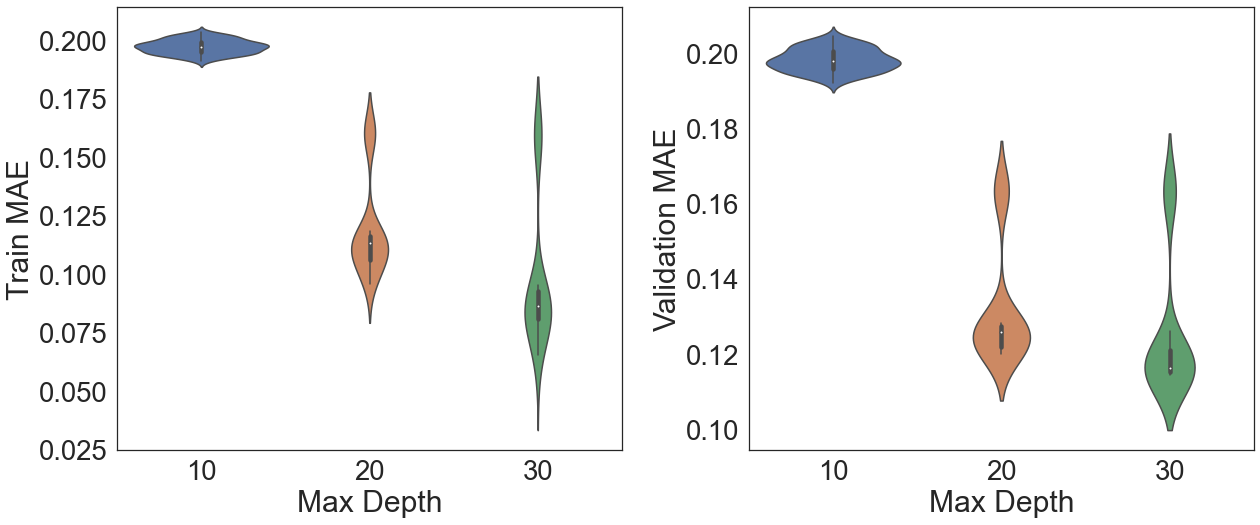

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,8))

sns.violinplot(x='max_depth', y='train_mae', ax=ax1, data=results_b0.append(results_b1).append(results_b2).append(results_b3).append(results_b4))
sns.violinplot(x='max_depth', y='val_mae', ax=ax2, data=results_b0.append(results_b1).append(results_b2).append(results_b3).append(results_b4))
plt.ylabel("Validation MAE")
ax1.set_xlabel("Max Depth")
ax2.set_xlabel("Max Depth")
ax1.set_ylabel("Train MAE")
ax2.set_ylabel("Validation MAE")
fig.tight_layout()
plt.savefig("figures/xgb_max_depth.png", bbox_inches='tight', dpi=300)

In [8]:
# plt.figure(figsize=(18,6))
# plt.scatter(results_b0.max_depth, results_b0.train_mae, label='Train Set')
# plt.scatter(results_b0.max_depth, results_b0.val_mae, label='Validation Set')
# plt.xlabel("Max Depth")
# plt.ylabel("MAE")
# plt.legend()
# plt.savefig("figures/xgb_max_depth.png", bbox_inches='tight', dpi=300)

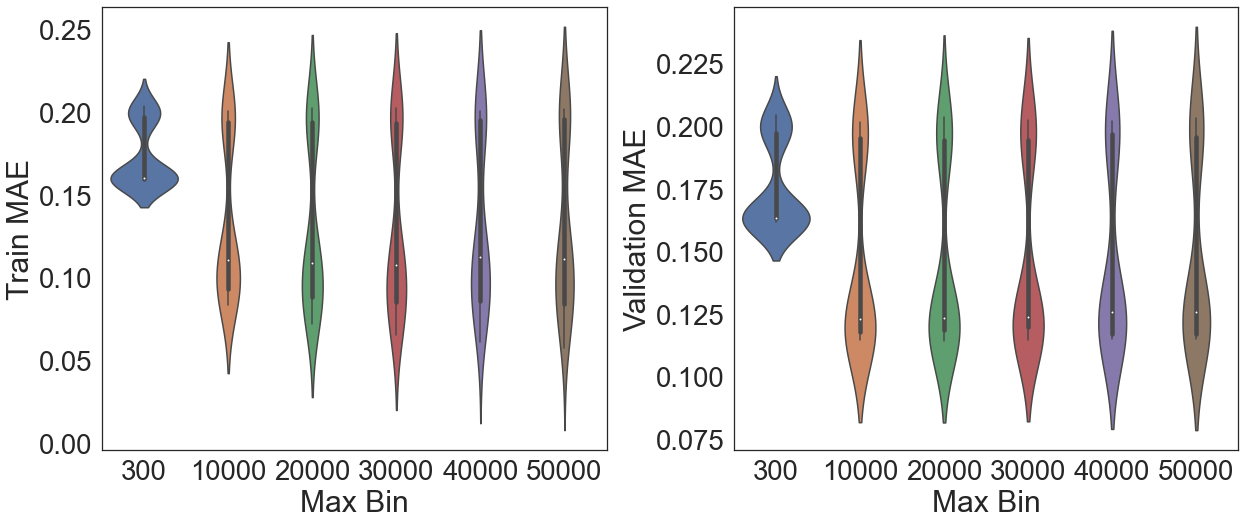

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,8))

sns.violinplot(x='max_bin', y='train_mae', ax=ax1, data=results_b0.append(results_b1).append(results_b2).append(results_b3).append(results_b4))
sns.violinplot(x='max_bin', y='val_mae', ax=ax2, data=results_b0.append(results_b1).append(results_b2).append(results_b3).append(results_b4))
plt.ylabel("Validation MAE")
ax1.set_xlabel("Max Bin")
ax2.set_xlabel("Max Bin")
ax1.set_ylabel("Train MAE")
ax2.set_ylabel("Validation MAE")
fig.tight_layout()
plt.savefig("figures/xgb_max_bin.png", bbox_inches='tight', dpi=300)

In [10]:
# fig, (ax1, ax2) = plt.subplots(2, figsize=(18,9))
# ax1.scatter(results_b0.max_bin, results_b0.train_mae, c='tab:blue') #, c=results_b0['l2'], cmap=plt.cm.bwr)
# ax1.scatter(results_b1.max_bin, results_b1.train_mae, c='tab:blue')
# ax1.scatter(results_b2.max_bin, results_b2.train_mae, c='tab:blue')
# ax1.scatter(results_b3.max_bin, results_b3.train_mae, c='tab:blue')
# ax1.scatter(results_b4.max_bin, results_b4.train_mae, c='tab:blue')
# ax1.set_ylabel("Train MAE")

# ax2.scatter(results_b0.max_bin, results_b0.val_mae, c="tab:green") #, c=results_b0['l2'], cmap=plt.cm.bwr)
# ax2.scatter(results_b1.max_bin, results_b1.val_mae, c="tab:green")
# ax2.scatter(results_b2.max_bin, results_b2.val_mae, c="tab:green")
# ax2.scatter(results_b3.max_bin, results_b3.val_mae, c="tab:green")
# ax2.scatter(results_b4.max_bin, results_b4.val_mae, c="tab:green")
# ax2.set_xlabel("Max Bin")
# ax2.set_ylabel("Validation MAE")
# plt.savefig(os.path.join("figures/", "xgb_max_bin.png"), bbox_inches='tight', dpi=300)

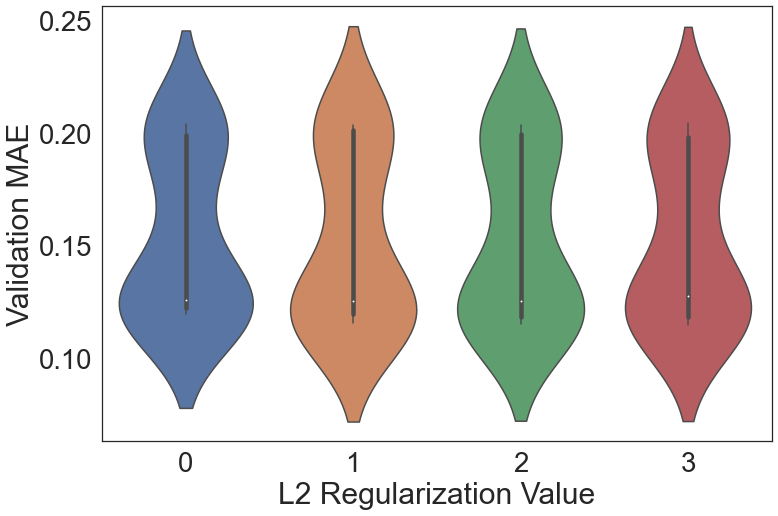

In [11]:
plt.figure(figsize=(12,8))
sns.violinplot(x="l2", y="val_mae", data=results_b0)
plt.ylabel("Validation MAE")
plt.xlabel("L2 Regularization Value")
plt.savefig("figures/xgb_l2.png", bbox_inches='tight', dpi=300)

In [12]:
# sns.catplot(x="l2", y="val_mae", data=results_b0, height=8, aspect=1, s=10)
# plt.ylabel("Validation MAE")
# plt.xlabel("L2 Regularization Value")
# plt.savefig("figures/xgb_l2.png", bbox_inches='tight', dpi=300)

# Getting Best Models

In [13]:
best_b0 = model_utils.get_best_models_df(results_b0, keep_first=True)
best_b1 = model_utils.get_best_models_df(results_b1, keep_first=True)
best_b2 = model_utils.get_best_models_df(results_b2, keep_first=True)
best_b3 = model_utils.get_best_models_df(results_b3, keep_first=True)
best_b4 = model_utils.get_best_models_df(results_b4, keep_first=True)

In [14]:
best_b0["dataset"] = "b0"
best_b1["dataset"] = "b1"
best_b2["dataset"] = "b2"
best_b3["dataset"] = "b3"
best_b4["dataset"] = "b4"

In [15]:
all_best_models = best_b0.append(best_b1).append(best_b2).append(best_b3).append(best_b4)
all_best_models = best_b0.append(best_b1).append(best_b2).append(best_b3).append(best_b4)[['dataset', 'max_depth', 'l2', 'max_bin', 'train_mae', 'val_mae', 'test_mae', 'tag']]
all_best_models = all_best_models[all_best_models.tag == "Val"].drop(columns=['tag'])
all_best_models['dataset'] = ['A', 'B', 'C', 'D', 'E']
all_best_models.columns = ['Dataset', 'Max Depth', 'L2 Regularization', 'Max Bin', 'Train MAE', 'Val MAE', 'Test MAE']
all_best_models

,Dataset,Max Depth,L2 Regularization,Max Bin,Train MAE,Val MAE,Test MAE
67,A,30,3,10000,0.093399,0.114572,0.114719
22,B,30,1,20000,0.079715,0.114399,0.115458
55,C,30,3,10000,0.094528,0.114533,0.115727
21,D,30,1,10000,0.088638,0.114844,0.114683
56,E,30,3,20000,0.088554,0.114577,0.115488


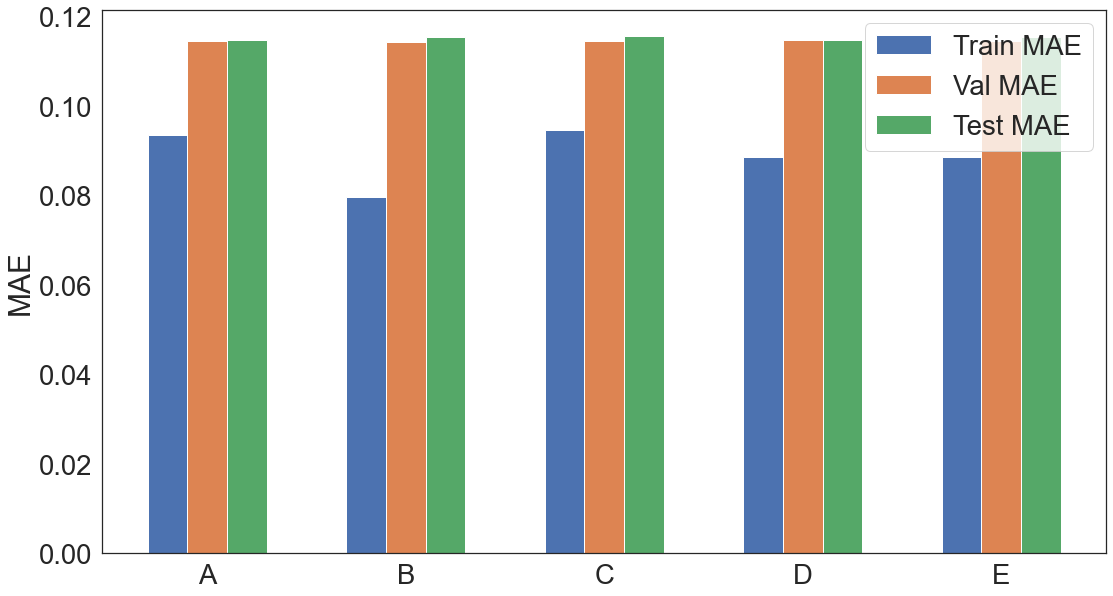

In [16]:
train_mae = all_best_models["Train MAE"].values
val_mae =  all_best_models["Val MAE"].values
test_mae =  all_best_models["Test MAE"].values

x = np.arange(len(all_best_models))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(18,10))
rects1 = ax.bar(x - width, train_mae, width, label='Train MAE')
rects2 = ax.bar(x, val_mae, width, label='Val MAE')
rects3 = ax.bar(x + width, test_mae, width, label='Test MAE')

ax.set_ylabel('MAE')
ax.set_xticks(x)
ax.set_xticklabels(all_best_models.Dataset.values)
ax.legend()

In [17]:
print(all_best_models.to_latex(index=False))

\begin{tabular}{lrrrrrr}
\toprule
Dataset &  Max Depth &  L2 Regularization &  Max Bin &  Train MAE &  Val MAE &  Test MAE \\
\midrule
      A &         30 &                  3 &    10000 &   0.093399 & 0.114572 &  0.114719 \\
      B &         30 &                  1 &    20000 &   0.079715 & 0.114399 &  0.115458 \\
      C &         30 &                  3 &    10000 &   0.094528 & 0.114533 &  0.115727 \\
      D &         30 &                  1 &    10000 &   0.088638 & 0.114844 &  0.114683 \\
      E &         30 &                  3 &    20000 &   0.088554 & 0.114577 &  0.115488 \\
\bottomrule
\end{tabular}



# Hyperparameter Exploration

In [18]:
import pylab as p
import mpl_toolkits.mplot3d.axes3d as p3
import seaborn as sns
from matplotlib import cm

sns.set(font_scale=1.5)
sns.set_style("white")

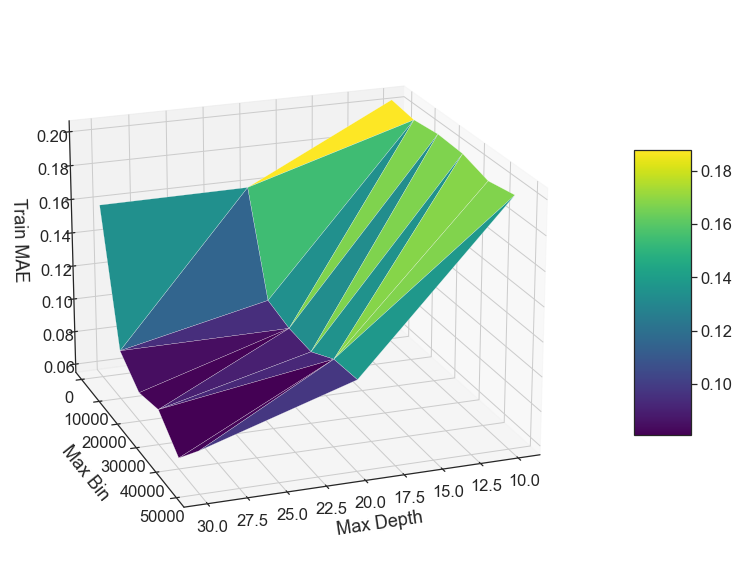

In [186]:
fig = plt.figure()
ax = fig.gca(projection='3d')
fig.set_size_inches(20, 10.5, forward=True)
surf = ax.plot_trisurf(results_b0.max_depth, results_b0.max_bin, results_b0.train_mae, linewidth=0.2, antialiased=True, cmap=cm.viridis)
ax.view_init(20, 70)
ax.set_ylabel("Max Bin", labelpad=15)
ax.set_xlabel("Max Depth", labelpad=10)
ax.set_zlabel("Train MAE", labelpad=15)

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.savefig("figures/xgb_3d_hyperparams.png", bbox_inches='tight', dpi=300)

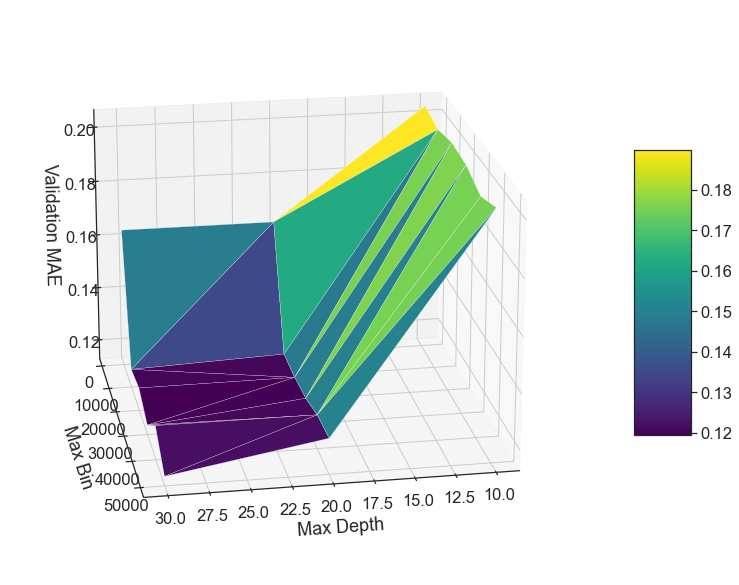

In [150]:
fig = plt.figure()
ax = fig.gca(projection='3d')
fig.set_size_inches(20, 10.5, forward=True)
surf = ax.plot_trisurf(results_b0.max_depth, results_b0.max_bin, results_b0.val_mae, linewidth=0.2, antialiased=True, cmap=cm.viridis)
ax.view_init(20, 80)
ax.set_ylabel("Max Bin", labelpad=15)
ax.set_xlabel("Max Depth", labelpad=10)
ax.set_zlabel("Validation MAE", labelpad=15)

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.savefig("figures/xgb_3d_hyperparams_val.png", bbox_inches='tight', dpi=300)

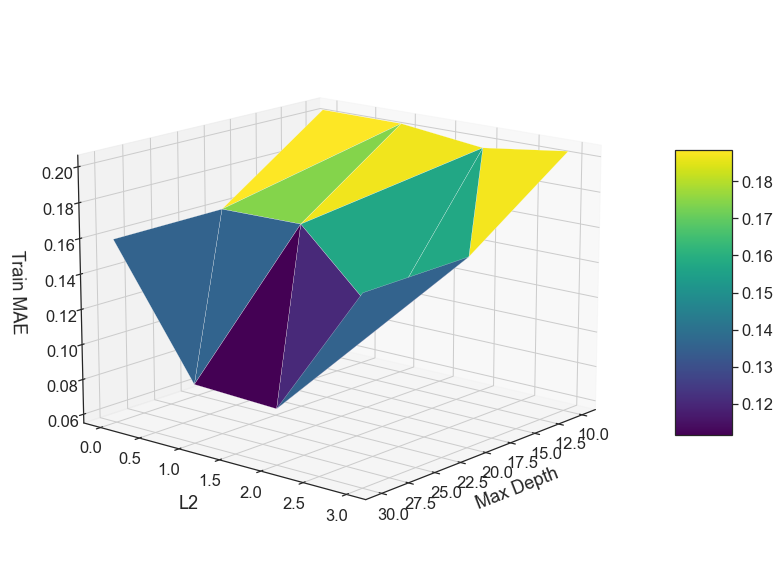

In [203]:
fig = plt.figure()
ax = fig.gca(projection='3d')
fig.set_size_inches(20, 10.5, forward=True)
surf = ax.plot_trisurf(results_b0.max_depth, results_b0.l2, results_b0.train_mae, linewidth=0.2, antialiased=True, cmap=cm.viridis)
ax.view_init(15, 40)
ax.set_ylabel("L2", labelpad=15)
ax.set_xlabel("Max Depth", labelpad=10)
ax.set_zlabel("Train MAE", labelpad=15)

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.savefig("figures/xgb_3d_md_l2.png", bbox_inches='tight', dpi=300)

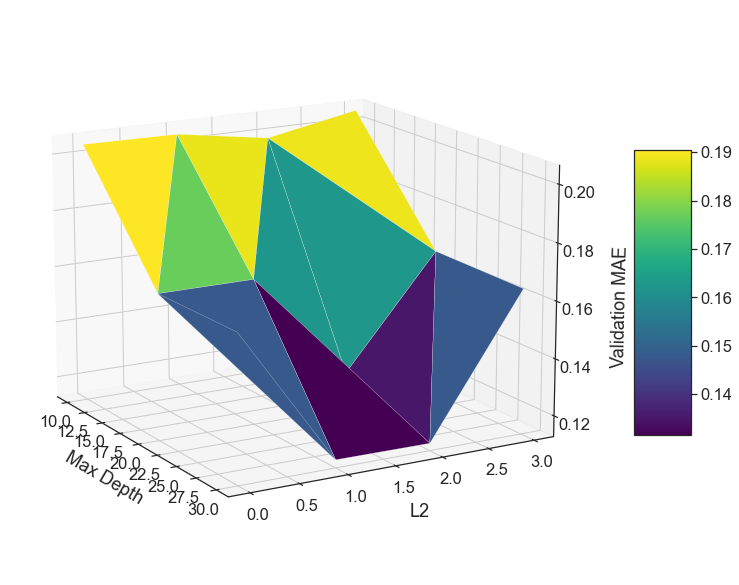

In [210]:
fig = plt.figure()
ax = fig.gca(projection='3d')
fig.set_size_inches(20, 10.5, forward=True)
surf = ax.plot_trisurf(results_b0.max_depth, results_b0.l2, results_b0.val_mae, linewidth=0.2, antialiased=True, cmap=cm.viridis)
ax.view_init(15, -30)
ax.set_ylabel("L2", labelpad=15)
ax.set_xlabel("Max Depth", labelpad=10)
ax.set_zlabel("Validation MAE", labelpad=15)

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.savefig("figures/xgb_3d_md_l2_val.png", bbox_inches='tight', dpi=300)

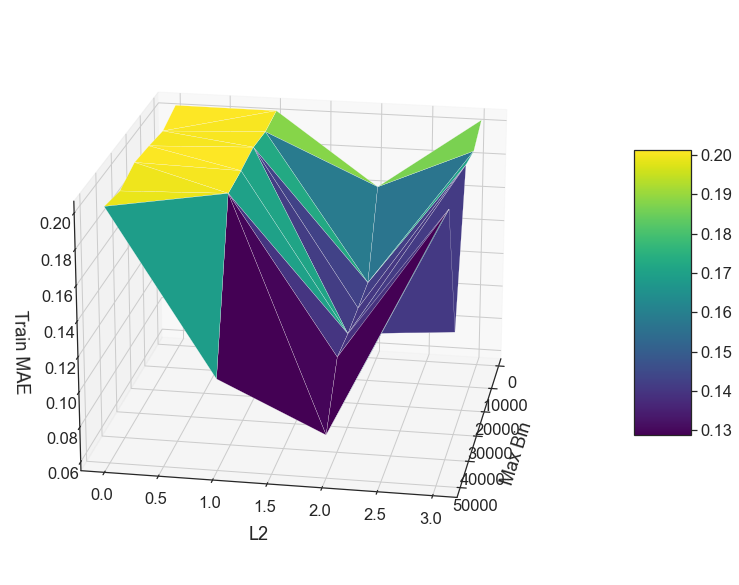

In [234]:
fig = plt.figure()
ax = fig.gca(projection='3d')
fig.set_size_inches(20, 10.5, forward=True)
surf = ax.plot_trisurf(results_b0.max_bin, results_b0.l2, results_b0.train_mae, linewidth=0.2, antialiased=True, cmap=cm.viridis)
ax.view_init(20, 10)
ax.set_ylabel("L2", labelpad=15)
ax.set_xlabel("Max Bin", labelpad=10)
ax.set_zlabel("Train MAE", labelpad=15)

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.savefig("figures/xgb_3d_mb_l2.png", bbox_inches='tight', dpi=300)

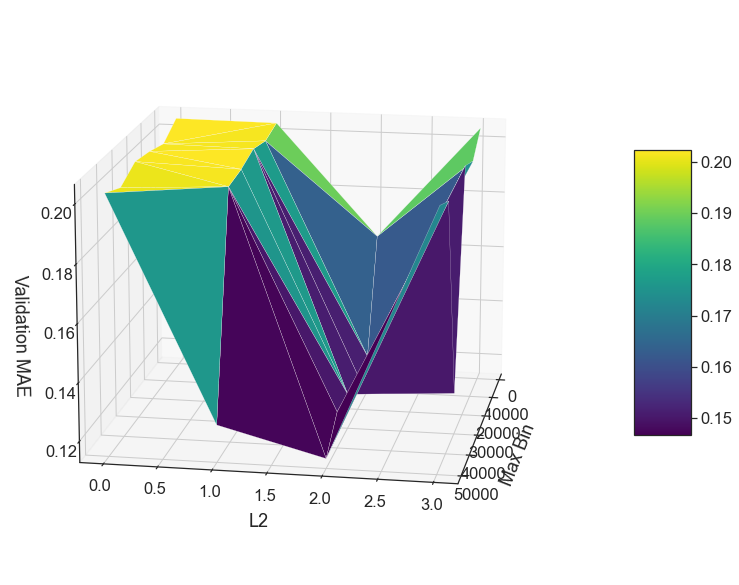

In [233]:
fig = plt.figure()
ax = fig.gca(projection='3d')
fig.set_size_inches(20, 10.5, forward=True)
surf = ax.plot_trisurf(results_b0.max_bin, results_b0.l2, results_b0.val_mae, linewidth=0.2, antialiased=True, cmap=cm.viridis)
ax.view_init(15, 10)
ax.set_ylabel("L2", labelpad=15)
ax.set_xlabel("Max Bin", labelpad=10)
ax.set_zlabel("Validation MAE", labelpad=15)

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.savefig("figures/xgb_3d_mb_l2_val.png", bbox_inches='tight', dpi=300)

In [23]:
def generate_3d_plots(results_df, dataset_name, saving_dir):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    fig.set_size_inches(20, 10.5, forward=True)
    surf = ax.plot_trisurf(results_df.max_depth, results_df.max_bin, results_df.train_mae, linewidth=0.2, antialiased=True, cmap=cm.viridis)
    ax.view_init(20, 70)
    ax.set_ylabel("Max Bin", labelpad=15)
    ax.set_xlabel("Max Depth", labelpad=10)
    ax.set_zlabel("Train MAE", labelpad=15)
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.savefig(os.path.join(saving_dir, "xgb_3d_md_mb_{}.png".format(dataset_name)), bbox_inches='tight', dpi=300)
    plt.close()
    
    
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    fig.set_size_inches(20, 10.5, forward=True)
    surf = ax.plot_trisurf(results_df.max_depth, results_df.max_bin, results_df.val_mae, linewidth=0.2, antialiased=True, cmap=cm.viridis)
    ax.view_init(20, 80)
    ax.set_ylabel("Max Bin", labelpad=15)
    ax.set_xlabel("Max Depth", labelpad=10)
    ax.set_zlabel("Validation MAE", labelpad=15)
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.savefig(os.path.join(saving_dir, "xgb_3d_md_mb_val_{}.png".format(dataset_name)), bbox_inches='tight', dpi=300)
    plt.close()
    
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    fig.set_size_inches(20, 10.5, forward=True)
    surf = ax.plot_trisurf(results_df.max_depth, results_df.l2, results_df.train_mae, linewidth=0.2, antialiased=True, cmap=cm.viridis)
    ax.view_init(15, 40)
    ax.set_ylabel("L2", labelpad=15)
    ax.set_xlabel("Max Depth", labelpad=10)
    ax.set_zlabel("Train MAE", labelpad=15)
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.savefig(os.path.join(saving_dir, "xgb_3d_md_l2_{}.png".format(dataset_name)), bbox_inches='tight', dpi=300)
    plt.close()
    
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    fig.set_size_inches(20, 10.5, forward=True)
    surf = ax.plot_trisurf(results_df.max_depth, results_df.l2, results_df.val_mae, linewidth=0.2, antialiased=True, cmap=cm.viridis)
    ax.view_init(15, -30)
    ax.set_ylabel("L2", labelpad=15)
    ax.set_xlabel("Max Depth", labelpad=10)
    ax.set_zlabel("Validation MAE", labelpad=15)
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.savefig(os.path.join(saving_dir, "xgb_3d_md_l2_val_{}.png".format(dataset_name)), bbox_inches='tight', dpi=300)
    plt.close()
    
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    fig.set_size_inches(20, 10.5, forward=True)
    surf = ax.plot_trisurf(results_df.max_bin, results_df.l2, results_df.train_mae, linewidth=0.2, antialiased=True, cmap=cm.viridis)
    ax.view_init(20, 10)
    ax.set_ylabel("L2", labelpad=15)
    ax.set_xlabel("Max Bin", labelpad=10)
    ax.set_zlabel("Train MAE", labelpad=15)
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.savefig(os.path.join(saving_dir, "xgb_3d_mb_l2_{}.png".format(dataset_name)), bbox_inches='tight', dpi=300)
    plt.close()
    
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    fig.set_size_inches(20, 10.5, forward=True)
    surf = ax.plot_trisurf(results_df.max_bin, results_df.l2, results_df.val_mae, linewidth=0.2, antialiased=True, cmap=cm.viridis)
    ax.view_init(15, 10)
    ax.set_ylabel("L2", labelpad=15)
    ax.set_xlabel("Max Bin", labelpad=10)
    ax.set_zlabel("Validation MAE", labelpad=15)
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.savefig(os.path.join(saving_dir, "xgb_3d_mb_l2_val_{}.png".format(dataset_name)), bbox_inches='tight', dpi=300)
    plt.close()

In [24]:
generate_3d_plots(results_b1, "b1", "Figures/B1")

In [25]:
generate_3d_plots(results_b1, "b2", "Figures/B2")

In [26]:
generate_3d_plots(results_b1, "b3", "Figures/B3")

In [27]:
generate_3d_plots(results_b1, "b4", "Figures/B4")

# Plotting Training Progress

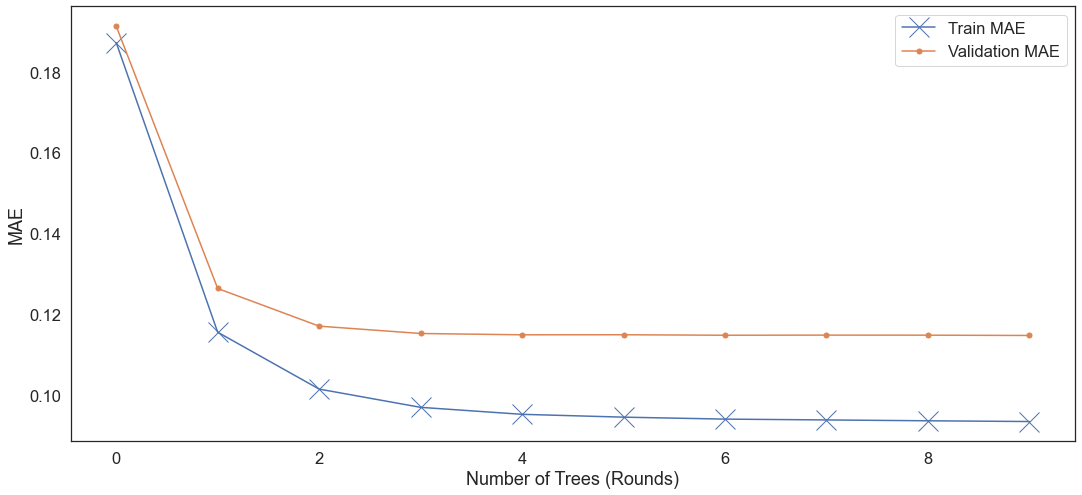

In [151]:
model_plots.xgb_training_w_path(
    os.path.join(os.path.dirname(best_b0.iloc[[1]].model_path.values[0]), "iteration_metrics.csv"), 
    save=True, saving_path='Figures/xgb_training_b0.png')

# Feature Importances

In [162]:
columns_b0 = pd.read_csv("../columns_b0.csv").replace({"Center_of_Mass_Flag_Center_of_Mass":"Center of Mass", "Center_of_Mass_Flag_Lab":"Lab Frame"})
columns_b1 = pd.read_csv("../columns_b1.csv").replace({"Center_of_Mass_Flag_Center_of_Mass":"Center of Mass", "Center_of_Mass_Flag_Lab":"Lab Frame"})
columns_b2 = pd.read_csv("../columns_b2.csv").replace({"Center_of_Mass_Flag_Center_of_Mass":"Center of Mass", "Center_of_Mass_Flag_Lab":"Lab Frame"})
columns_b3 = pd.read_csv("../columns_b3.csv").replace({"Center_of_Mass_Flag_Center_of_Mass":"Center of Mass", "Center_of_Mass_Flag_Lab":"Lab Frame"})
columns_b4 = pd.read_csv("../columns_b4.csv").replace({"Center_of_Mass_Flag_Center_of_Mass":"Center of Mass", "Center_of_Mass_Flag_Lab":"Lab Frame"})

In [163]:
columns_b0 = [x.replace("_", " ") for x in columns_b0.data_columns]
columns_b1 = [x.replace("_", " ") for x in columns_b1.data_columns]
columns_b2 = [x.replace("_", " ") for x in columns_b2.data_columns]
columns_b3 = [x.replace("_", " ") for x in columns_b3.data_columns]
columns_b4 = [x.replace("_", " ") for x in columns_b4.data_columns]

In [154]:
b0_train_model = model_utils.load_model_and_scaler(best_b0.iloc[[0]], model_only=True)
b1_train_model = model_utils.load_model_and_scaler(best_b1.iloc[[0]], model_only=True)
b2_train_model = model_utils.load_model_and_scaler(best_b2.iloc[[0]], model_only=True)
b3_train_model = model_utils.load_model_and_scaler(best_b3.iloc[[0]], model_only=True)
b4_train_model = model_utils.load_model_and_scaler(best_b4.iloc[[0]], model_only=True)

In [160]:
b0_importances = b0_train_model.get_score(importance_type='gain')
b1_importances = b1_train_model.get_score(importance_type='gain')
b2_importances = b2_train_model.get_score(importance_type='gain')
b3_importances = b3_train_model.get_score(importance_type='gain')
b4_importances = b4_train_model.get_score(importance_type='gain')

In [172]:
b0_importances_w = b0_train_model.get_score(importance_type='weight')
b1_importances_w = b1_train_model.get_score(importance_type='weight')
b2_importances_w = b2_train_model.get_score(importance_type='weight')
b3_importances_w = b3_train_model.get_score(importance_type='weight')
b4_importances_w = b4_train_model.get_score(importance_type='weight')

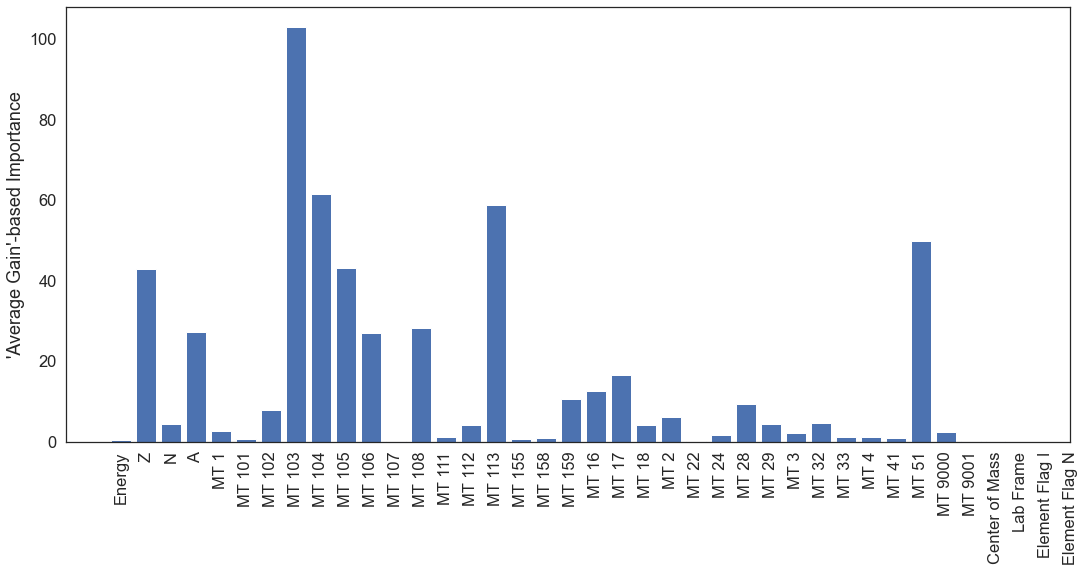

In [247]:
plt.figure(figsize=(18,8))
plt.bar([x for x in range(len(b0_importances))], b0_importances.values())
plt.xticks(np.arange(len(columns_b0)), columns_b0, rotation=90) 
plt.ylabel("'Average Gain'-based Importance")
plt.savefig("figures/xgb_feat_import_gain_b0.png", bbox_inches='tight', dpi=300)
plt.show()

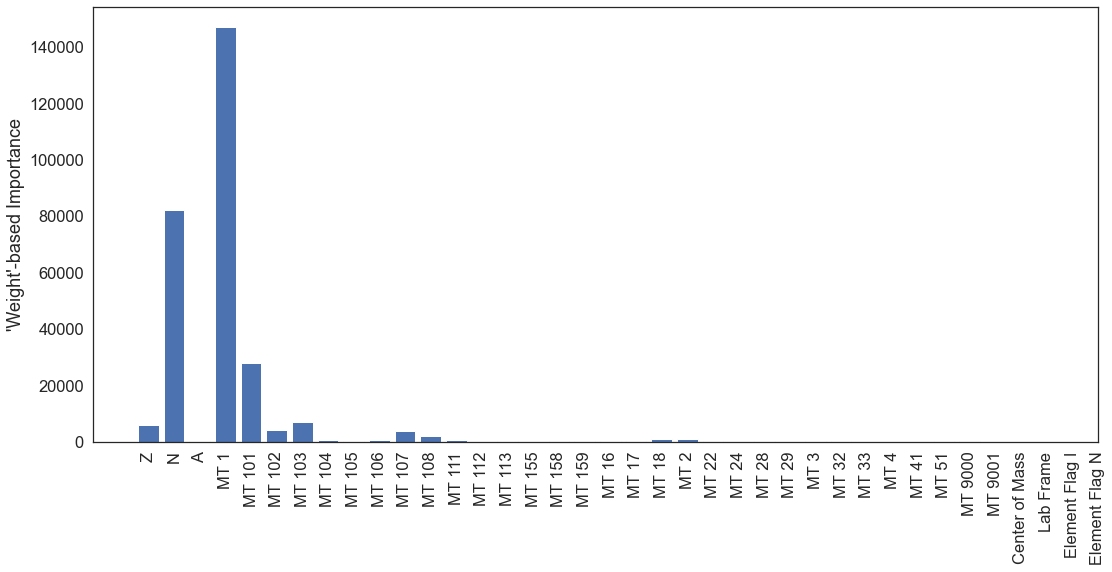

In [246]:
plt.figure(figsize=(18,8))
plt.bar([x for x in range(len(list(b0_importances_w.values())[1:]))], list(b0_importances_w.values())[1:])
plt.xticks(np.arange(len(columns_b0[1:])), columns_b0[1:], rotation=90) 
plt.ylabel("'Weight'-based Importance")
plt.savefig("figures/xgb_feat_import_weight_b0.png", bbox_inches='tight', dpi=300)
plt.show()

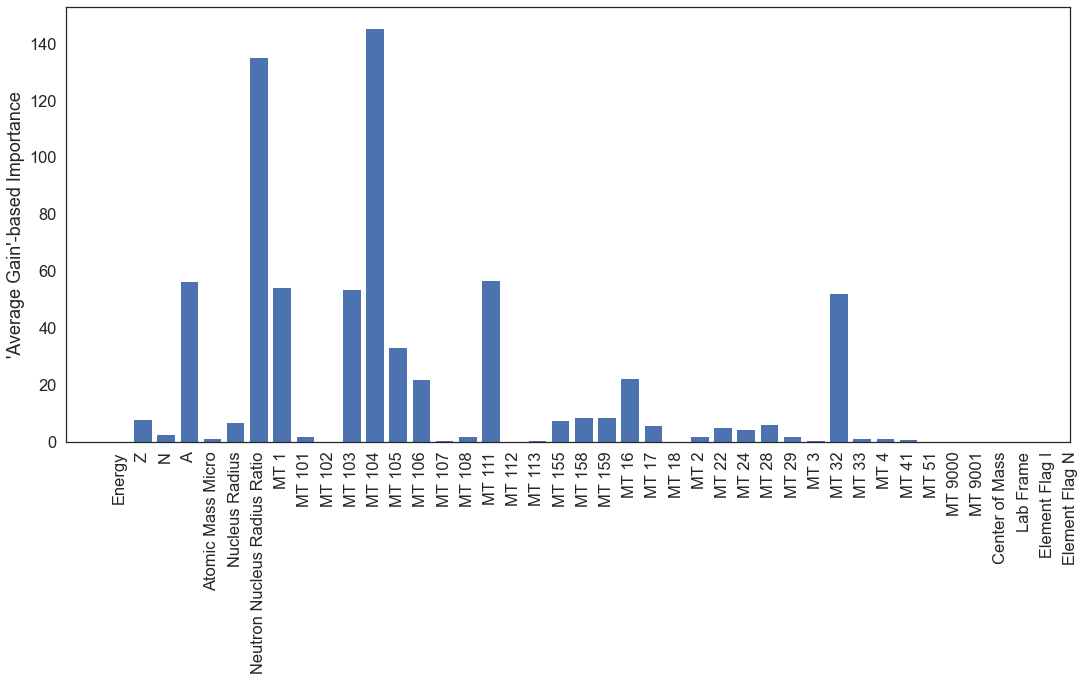

In [257]:
plt.figure(figsize=(18,8))
plt.bar([x for x in range(len(b1_importances))], b1_importances.values())
plt.xticks(np.arange(len(columns_b1)), columns_b1, rotation=90) 
plt.ylabel("'Average Gain'-based Importance")
plt.savefig("figures/xgb_feat_import_gain_b1.png", bbox_inches='tight', dpi=300)
plt.show()

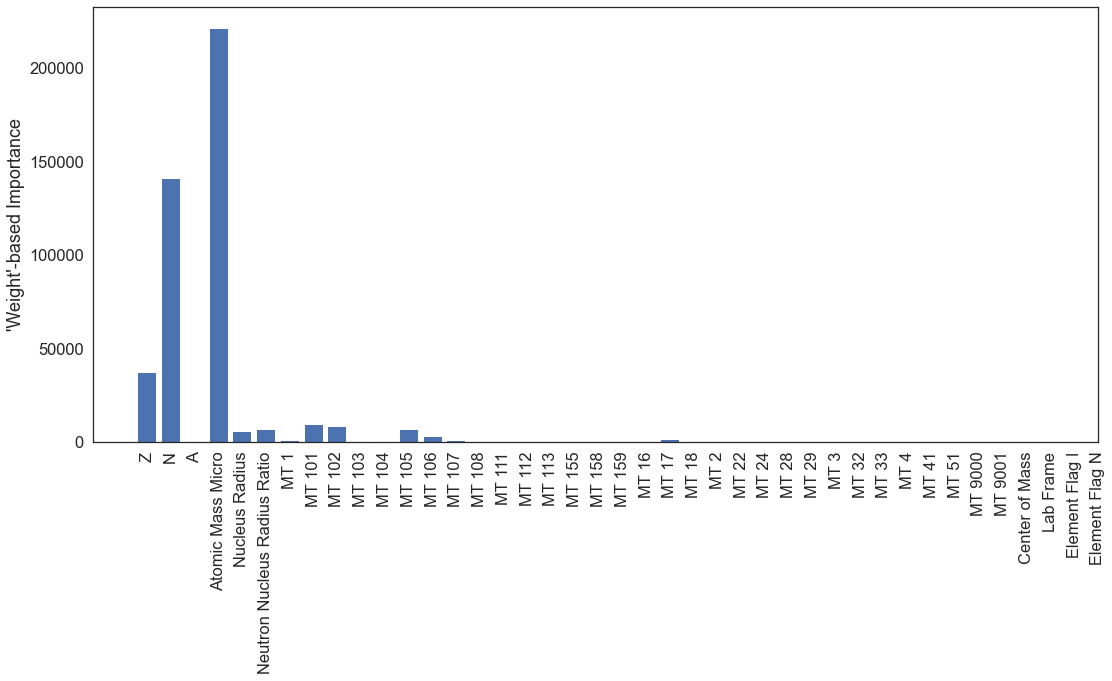

In [258]:
plt.figure(figsize=(18,8))
plt.bar([x for x in range(len(list(b1_importances_w.values())[1:]))], list(b1_importances_w.values())[1:])
plt.xticks(np.arange(len(columns_b1[1:])), columns_b1[1:], rotation=90) 
plt.ylabel("'Weight'-based Importance")
plt.savefig("figures/xgb_feat_import_weight_b1.png", bbox_inches='tight', dpi=300)
plt.show()

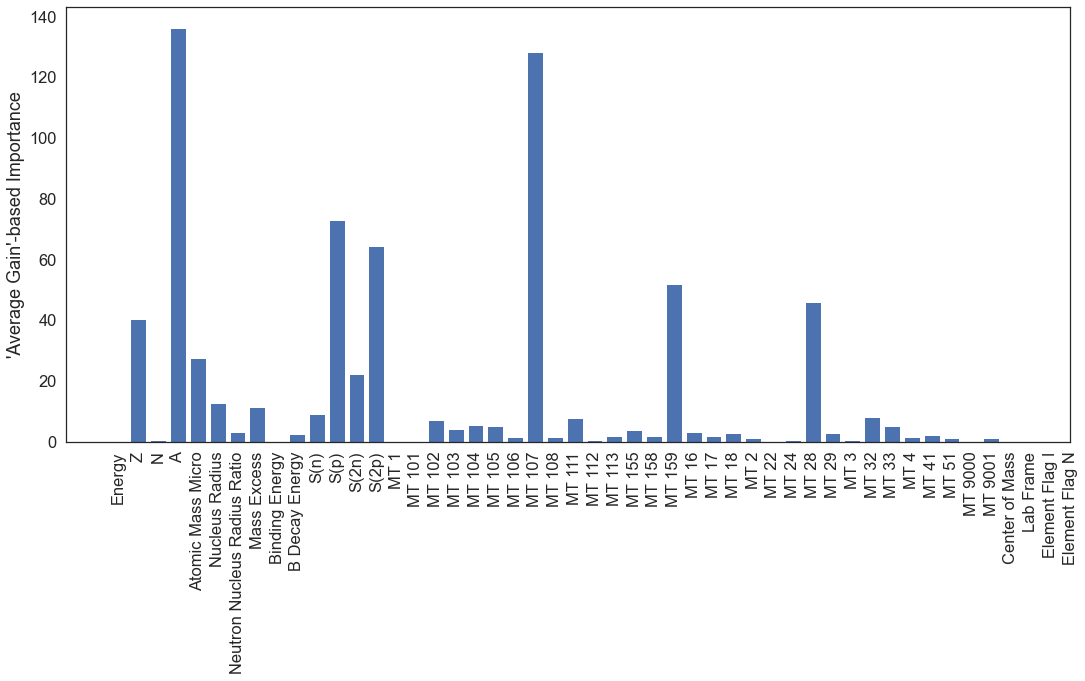

In [259]:
plt.figure(figsize=(18,8))
plt.bar([x for x in range(len(b2_importances))], b2_importances.values())
plt.xticks(np.arange(len(columns_b2)), columns_b2, rotation=90) 
plt.ylabel("'Average Gain'-based Importance")
plt.savefig("figures/xgb_feat_import_gain_b2.png", bbox_inches='tight', dpi=300)
plt.show()

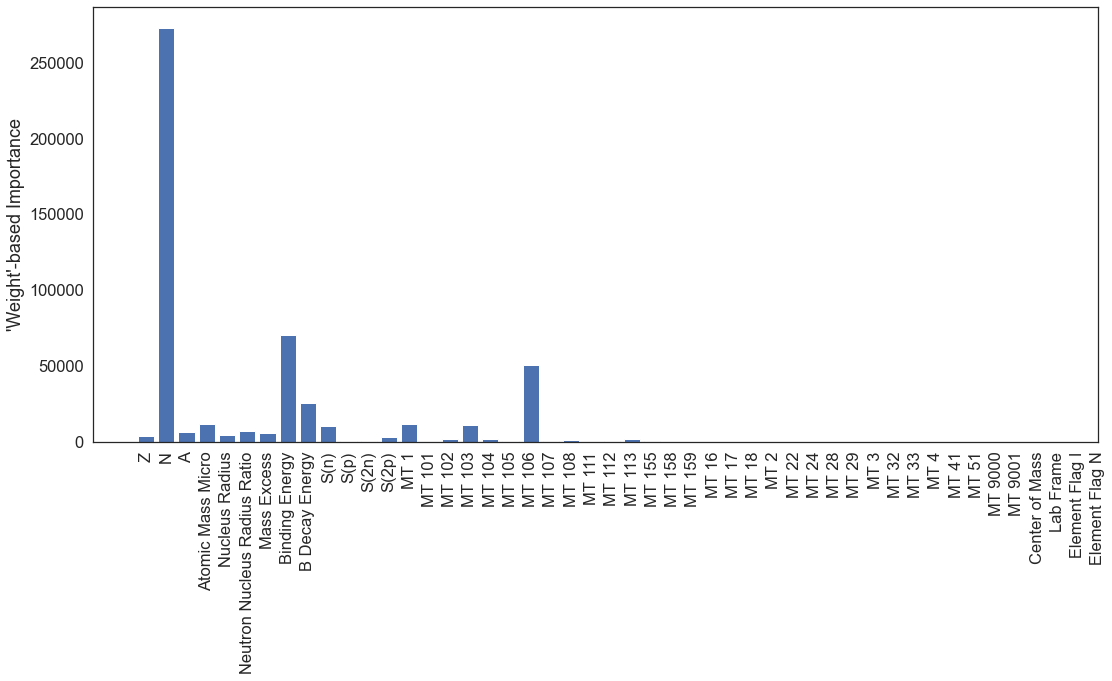

In [260]:
plt.figure(figsize=(18,8))
plt.bar([x for x in range(len(list(b2_importances_w.values())[1:]))], list(b2_importances_w.values())[1:])
plt.xticks(np.arange(len(columns_b2[1:])), columns_b2[1:], rotation=90) 
plt.ylabel("'Weight'-based Importance")
plt.savefig("figures/xgb_feat_import_weight_b2.png", bbox_inches='tight', dpi=300)
plt.show()

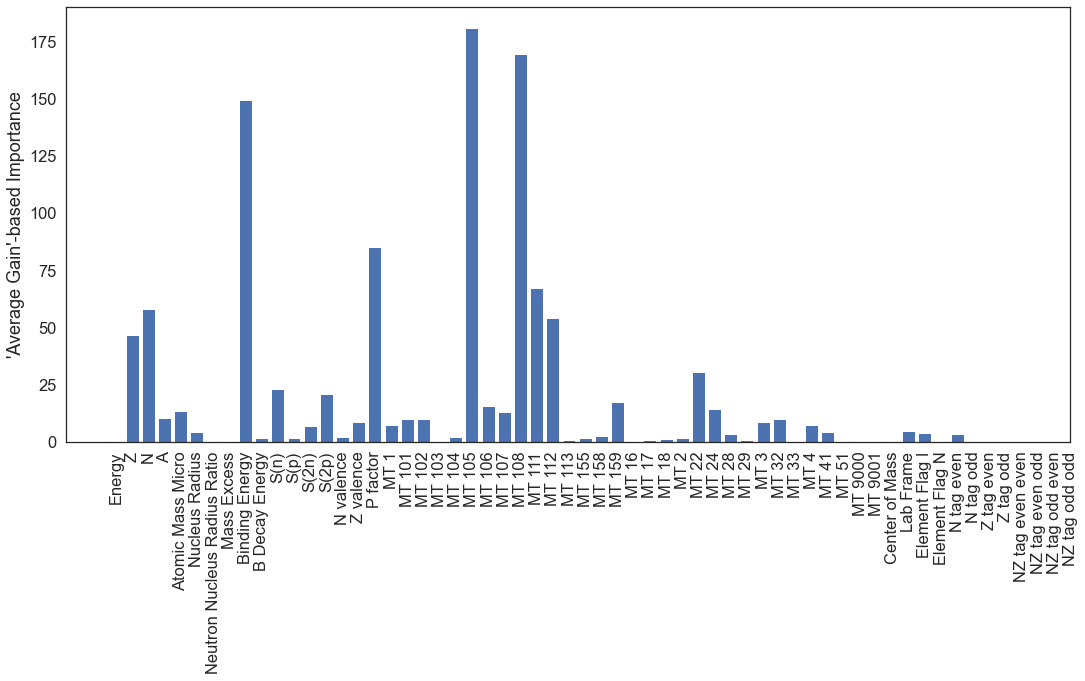

In [261]:
plt.figure(figsize=(18,8))
plt.bar([x for x in range(len(b3_importances))], b3_importances.values())
plt.xticks(np.arange(len(columns_b3)), columns_b3, rotation=90) 
plt.ylabel("'Average Gain'-based Importance")
plt.savefig("figures/xgb_feat_import_gain_b3.png", bbox_inches='tight', dpi=300)
plt.show()

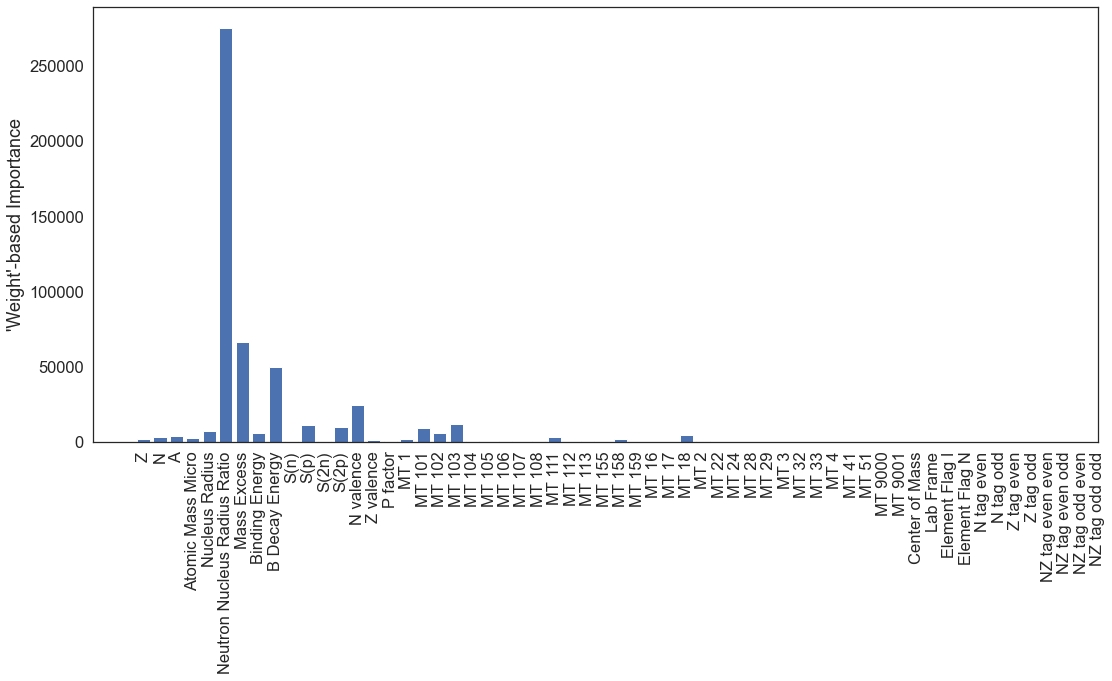

In [262]:
plt.figure(figsize=(18,8))
plt.bar([x for x in range(len(list(b3_importances_w.values())[1:]))], list(b3_importances_w.values())[1:])
plt.xticks(np.arange(len(columns_b3[1:])), columns_b3[1:], rotation=90) 
plt.ylabel("'Weight'-based Importance")
plt.savefig("figures/xgb_feat_import_weight_b3.png", bbox_inches='tight', dpi=300)
plt.show()

In [265]:
# plt.figure(figsize=(18,8))
# plt.bar([x for x in range(len(b4_importances))], b4_importances.values())
# plt.xticks(np.arange(len(columns_b4)), columns_b4, rotation=90) 
# plt.ylabel("'Average Gain'-based Importance")
# plt.savefig("figures/xgb_feat_import_gain_b4.png", bbox_inches='tight', dpi=300)
# plt.show()

In [266]:
# plt.figure(figsize=(18,8))
# plt.bar([x for x in range(len(list(b4_importances_w.values())[1:]))], list(b4_importances_w.values())[1:])
# plt.xticks(np.arange(len(columns_b4[1:])), columns_b4[1:], rotation=90) 
# plt.ylabel("'Weight'-based Importance")
# plt.savefig("figures/xgb_feat_import_weight_b4.png", bbox_inches='tight', dpi=300)
# plt.show()

# Training Loss vs Number of Rounds

In [243]:
# plt.figure(figsize=(18,8))
# plt.bar([x for x in range(len(list(b2_importances_w.values())[1:]))], list(b2_importances_w.values())[1:])
# plt.xticks(np.arange(len(columns_b2[1:])), columns_b2[1:], rotation=90) 
# plt.ylabel("'Weight'-based Importance")
# plt.savefig("figures/xgb_feat_import_weight_b2.png", bbox_inches='tight', dpi=300)
# plt.show()

In [ ]:
b0_train_model = model_utils.load_model_and_scaler(best_b0.iloc[[0]], model_only=True)
b1_train_model = model_utils.load_model_and_scaler(best_b1.iloc[[0]], model_only=True)
b2_train_model = model_utils.load_model_and_scaler(best_b2.iloc[[0]], model_only=True)
b3_train_model = model_utils.load_model_and_scaler(best_b3.iloc[[0]], model_only=True)
b4_train_model = model_utils.load_model_and_scaler(best_b4.iloc[[0]], model_only=True)

b0_train_model.feature_importances_.shape

tick_labels = [x.replace("_", " ") for x in x_train.columns]

tick_labels[-4] = "Center of Mass"

tick_labels[-3] = "Lab Frame"

plt.figure(figsize=(18,10))
plt.bar([x for x in range(len(b0_train_model.feature_importances_))], b0_train_model.feature_importances_)
plt.xticks(np.arange(len(x_train.columns)), tick_labels, rotation=90) 
plt.show()

In [71]:
# model_plots.xgb_training_w_path(os.path.join(os.path.dirname(best_b1.iloc[[1]].model_path.values[0]), "iteration_metrics.csv"))
# model_plots.xgb_training_w_path(os.path.join(os.path.dirname(best_b2.iloc[[1]].model_path.values[0]), "iteration_metrics.csv"))
# model_plots.xgb_training_w_path(os.path.join(os.path.dirname(best_b3.iloc[[1]].model_path.values[0]), "iteration_metrics.csv"))
# model_plots.xgb_training_w_path(os.path.join(os.path.dirname(best_b4.iloc[[1]].model_path.values[0]), "iteration_metrics.csv"))

In [63]:
training_b0 = pd.read_csv(os.path.join(os.path.dirname(best_b0.iloc[[1]].model_path.values[0]), "iteration_metrics.csv"))
training_b1 = pd.read_csv(os.path.join(os.path.dirname(best_b1.iloc[[1]].model_path.values[0]), "iteration_metrics.csv"))
training_b2 = pd.read_csv(os.path.join(os.path.dirname(best_b2.iloc[[1]].model_path.values[0]), "iteration_metrics.csv"))
training_b3 = pd.read_csv(os.path.join(os.path.dirname(best_b3.iloc[[1]].model_path.values[0]), "iteration_metrics.csv"))
training_b4 = pd.read_csv(os.path.join(os.path.dirname(best_b4.iloc[[1]].model_path.values[0]), "iteration_metrics.csv"))

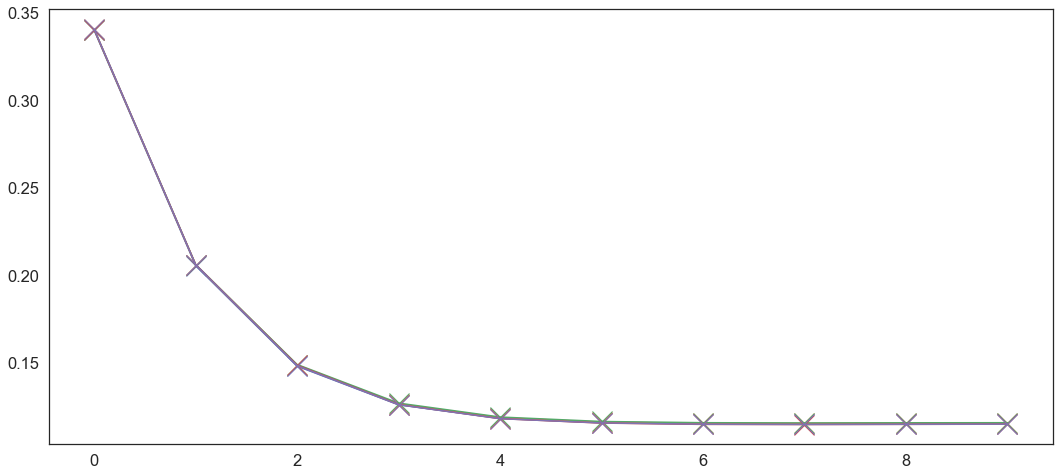

In [64]:
plt.figure(figsize=(18,8))
plt.plot(training_b0.mae_test, label="Dataset A", marker="x", markersize="20")
plt.plot(training_b1.mae_test, label="Dataset B", marker="x", markersize="20")
plt.plot(training_b2.mae_test, label="Dataset C", marker="x", markersize="20")
plt.plot(training_b3.mae_test, label="Dataset D", marker="x", markersize="20")
plt.plot(training_b4.mae_test, label="Dataset E", marker="x", markersize="20")

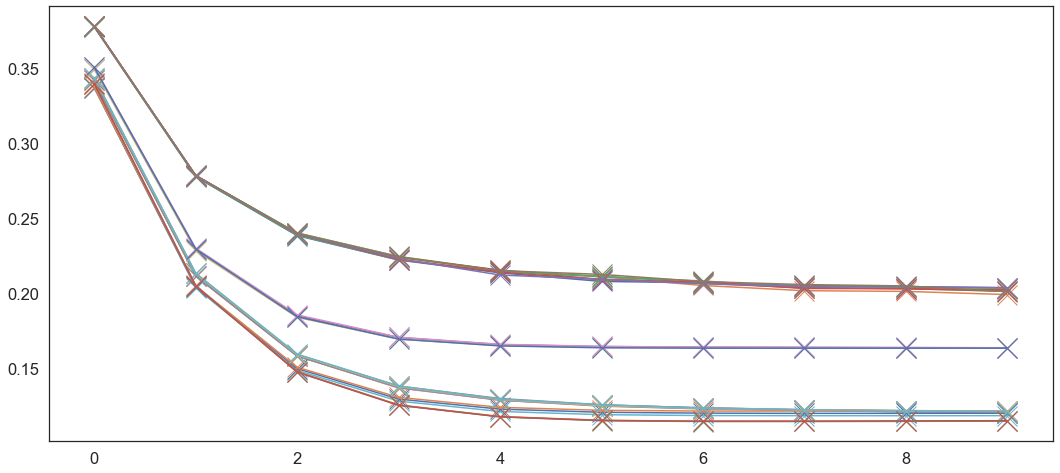

In [70]:
plt.figure(figsize=(18,8))
for i, row in results_b0.iterrows():
    training = pd.read_csv(os.path.join(os.path.dirname(row.model_path), "iteration_metrics.csv"))
    plt.plot(training.mae_test, marker="x", markersize="20")

TODO:

- Train L2 = 2, 3
- Train Max Bin > 30,000